In [9]:
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph, START, END 

## Reducers

from typing import Annotated 
from langgraph.graph.message import add_messages 


In [10]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]
                        

                        

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [12]:
from langchain_openai import ChatOpenAI 
llm = ChatOpenAI(model="gpt-4o") 
llm.invoke("Hello, world!")




AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_1827dd0c55', 'id': 'chatcmpl-CN16ChDYEA0igBmr2QnVkvQ56KcdF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--044ce8c1-2be0-4098-bc60-2e91f257a719-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hello, world!")


AIMessage(content='<think>\nOkay, the user said "Hello, world!" which is a classic first line in programming. I should acknowledge their greeting and make it friendly. Maybe add an emoji to keep it light. Let me check if there\'s anything else they might need. Since they just said hello, I don\'t want to assume anything else, so a simple response that invites them to ask more questions if needed would be best. Alright, that should cover it.\n</think>\n\nHello! 🌍 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 106, 'prompt_tokens': 12, 'total_tokens': 118, 'completion_time': 0.237299475, 'prompt_time': 0.000474973, 'queue_time': 0.196862084, 'total_time': 0.237774448}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--0b34fd5e-7b54-463a-ba2c-ffda721a6934-0', usage_metadata={'input_tokens': 12, 'output_tokens': 106, 'total_toke

In [14]:
### We will start creating Nodes. 

def superbot(state: State): 
    return {"messages":[llm_groq.invoke(state['messages'])]}

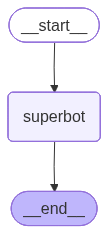

{'messages': [HumanMessage(content='Hello, my name is Jayant, I like cricket.', additional_kwargs={}, response_metadata={}, id='4e8f8334-2c5e-4993-9e46-e4bc06a6bf3c'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Jayant and mentioned he likes cricket. I need to respond appropriately. Let me start by greeting him back and acknowledging his interest in cricket. I should ask him a question to keep the conversation going. Maybe ask which team he supports or if he plays cricket. That way, I can engage him further. Let me check the response again to make sure it's friendly and open-ended.\n</think>\n\nHello Jayant! Nice to meet you. Cricket is a fantastic sport—I'd love to hear more about what you enjoy most about it. Do you follow any particular team or player? Or do you play the game yourself? 🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 137, 'prompt_tokens': 20, 'total_tokens': 157, 'completion_time': 0.302351137, 'prompt_time': 0

In [ ]:
### Nodes 
graph = StateGraph(State)
graph.add_node("superbot",superbot) 

### Edges 
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile() 

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [ ]:
## Invocation 
graph_builder.invoke({'messages':'Hello, my name is Jayant, I like cricket.'})




{'messages': [HumanMessage(content='Hello, my name is Jayant, I like cricket.', additional_kwargs={}, response_metadata={}, id='06143ddb-6b68-4ead-80fe-cc009a6ad56e'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Jayant and mentioned he likes cricket. I should respond in a friendly manner, acknowledge his name, and show interest in cricket. Let me make sure to keep the tone positive and engaging. Maybe ask him about his favorite teams or players to continue the conversation. Also, check for any typos or errors in my response. Alright, that should cover it.\n</think>\n\nHello Jayant! Nice to meet you. Cricket is an amazing sport—do you follow any particular team or player closely? I'd love to hear what you enjoy most about the game! 🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 20, 'total_tokens': 145, 'completion_time': 0.268491254, 'prompt_time': 0.000947086, 'queue_time': 0.284703824, 'total_time': 0.2694

In [22]:
## Streaming

for event in graph_builder.stream({"messages":"Hello My name is Jayant"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is Jayant', additional_kwargs={}, response_metadata={}, id='c9af01a7-a031-49ac-bbab-f45352fdd0c2')]}
{'messages': [HumanMessage(content='Hello My name is Jayant', additional_kwargs={}, response_metadata={}, id='c9af01a7-a031-49ac-bbab-f45352fdd0c2'), AIMessage(content='<think>\nOkay, the user introduced himself as Jayant. I should acknowledge his introduction and ask how I can assist him. Keep it friendly and open-ended.\n</think>\n\nHello Jayant! Nice to meet you. How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 14, 'total_tokens': 67, 'completion_time': 0.094900582, 'prompt_time': 0.000549172, 'queue_time': 0.219606685, 'total_time': 0.095449754}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--38bbb83b-f507-41fb-b93c-fc6c5111092c-0', usage_metadata={